### Carregar Bibliotecas Essenciais


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Configurações visuais
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

### Baixar o Dataset do Kaggle


In [2]:
import kagglehub

path = kagglehub.dataset_download("blurredmachine/are-your-employees-burning-out")

### Carregar Dados de Treino e Teste


In [3]:
import os

train_path = os.path.join(path, "train.csv")
test_path = os.path.join(path, "test.csv")

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

### Visualizar as Primeiras Linhas do DataFrame de Treino


In [4]:
df_train.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


### Verificar as Dimensões dos DataFrames


In [5]:
df_train.shape, df_test.shape


((22750, 9), (12250, 8))

### Informações Gerais do DataFrame de Treino


In [6]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


### Contar Valores Ausentes por Coluna


In [7]:
df_train.isnull().sum()


Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

###  Calcular a Porcentagem de Valores Ausentes






In [8]:
(df_train.isnull().sum()/df_train.shape[0])*100

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     6.070330
Mental Fatigue Score    9.305495
Burn Rate               4.940659
dtype: float64

### Estatísticas Descritivas das Variáveis Numéricas


In [9]:
df_train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


### Visualizar Distribuição de Variáveis Numéricas
A análise das distribuições das variáveis numéricas indica que o escore de fadiga mental apresenta mediana levemente superior à média, sugerindo que a maior parte dos indivíduos percebe seu nível de fadiga como médio ou moderadamente elevado. Em relação à variável Resource Allocation, que representa a carga de trabalho, observa-se maior dispersão dos valores, indicando heterogeneidade na quantidade de horas ou recursos alocados entre os colaboradores. Embora sejam identificados alguns valores atípicos no Mental Fatigue Score, estes não se mostram severos, não comprometendo a qualidade dos dados nem justificando a aplicação de tratamentos adicionais. Ademais, a distribuição da variável Designation concentra-se majoritariamente nos níveis intermediários (2 e 3), refletindo uma estrutura organizacional com maior número de colaboradores em cargos médios e menor representatividade nos níveis hierárquicos extremos.

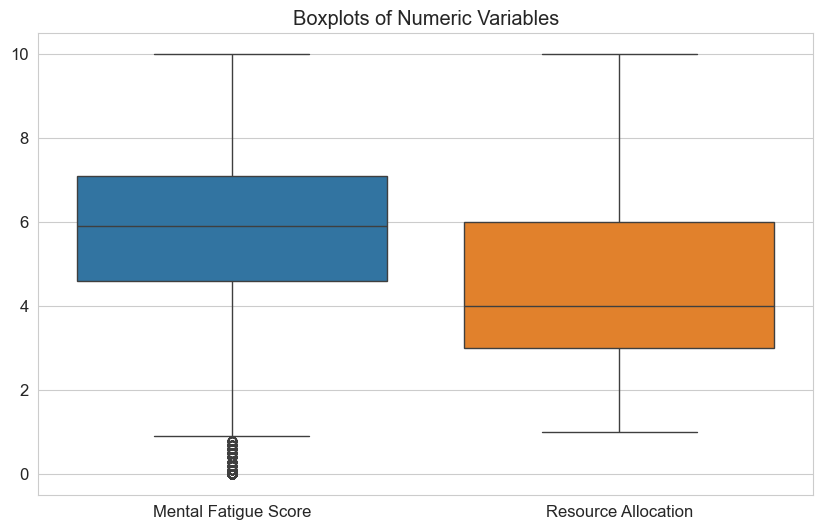

In [10]:
sns.boxplot(data=df_train[
    [ "Mental Fatigue Score", "Resource Allocation"]
])
plt.title("Boxplots of Numeric Variables")
plt.show()


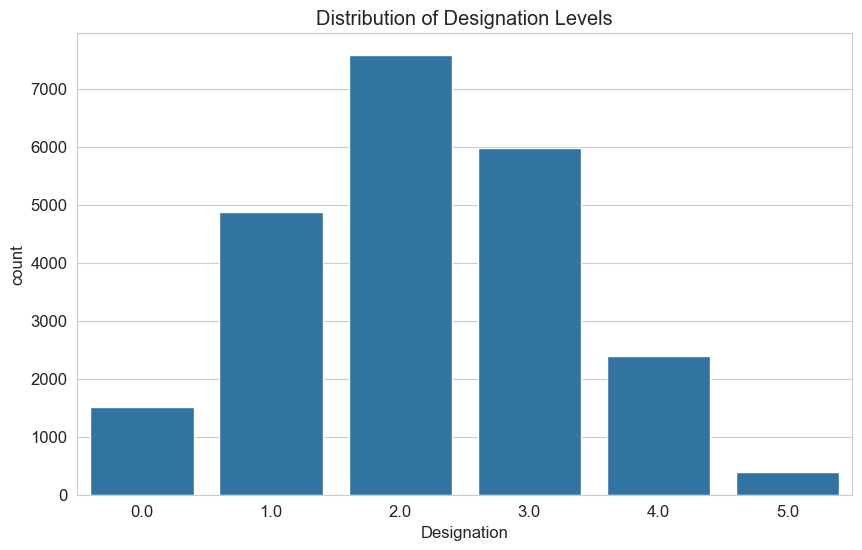

In [11]:
sns.countplot(x="Designation", data=df_train)
plt.title("Distribution of Designation Levels")
plt.show()


### Visualização da distribuição do Burn Rate
A variável Burn Rate apresenta distribuição aproximadamente simétrica, com maior concentração em valores intermediários e redução progressiva nas extremidades. Na ausência de limiares clínicos definidos, adotou-se a discretização baseada em quantis da própria distribuição. O percentil 66 foi utilizado para identificar o grupo de maior risco, isolando o terço superior da amostra de forma estatistica.

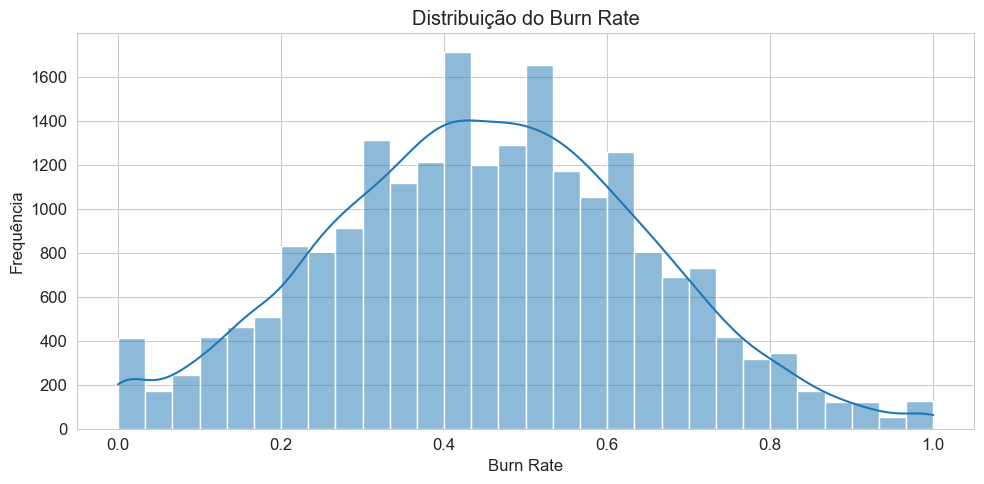

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train['Burn Rate'], bins=30, kde=True)
plt.title("Distribuição do Burn Rate")
plt.xlabel("Burn Rate")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()



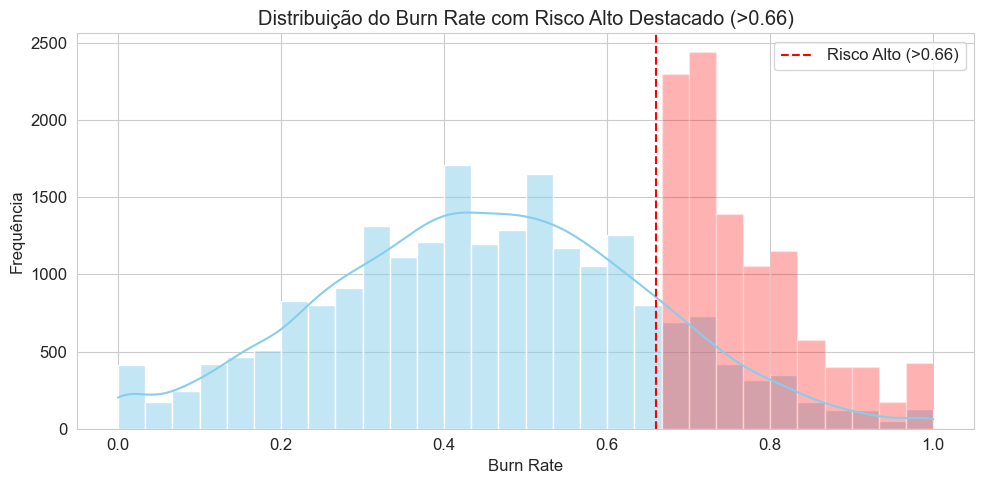

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train['Burn Rate'], bins=30, kde=True, color='skyblue')

# Define o threshold para alto acima de 0.66
alto_risk_threshold = 0.66

# Adiciona uma linha vertical pro risco alto
plt.axvline(x=alto_risk_threshold, color='red', linestyle='--', label=f'Risco Alto (>{alto_risk_threshold:.2f})')

# Muda a cor da área do risco alto
plt.hist(df_train['Burn Rate'], bins=30, color='red', alpha=0.3,
         weights=np.where(df_train['Burn Rate'] > alto_risk_threshold, 1, 0) * (100.0 / len(df_train['Burn Rate'])) * len(df_train['Burn Rate']) / 30)

plt.title("Distribuição do Burn Rate com Risco Alto Destacado (>0.66)")
plt.xlabel("Burn Rate")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()

### Relação das variáveis numéricas com o Burn Rate
Observa-se uma relação aproximadamente linear entre Burn Rate e Mental Fatigue Score, apenas com mais dispersões nas variáveis Resource Allocation e Designation, indicando que modelos lineares são adequados como abordagem inicial. Os boxplots mostram aumento progressivo das medianas do Burn Rate com o crescimento da Resource Allocation e da Designation, sugerindo influência da carga de trabalho e do nível hierárquico no risco de burnout. Esses padrões motivaram a criação de atributos derivados para capturar efeitos combinados entre a hierarquia e horas trabalhadas no Burn Rate.



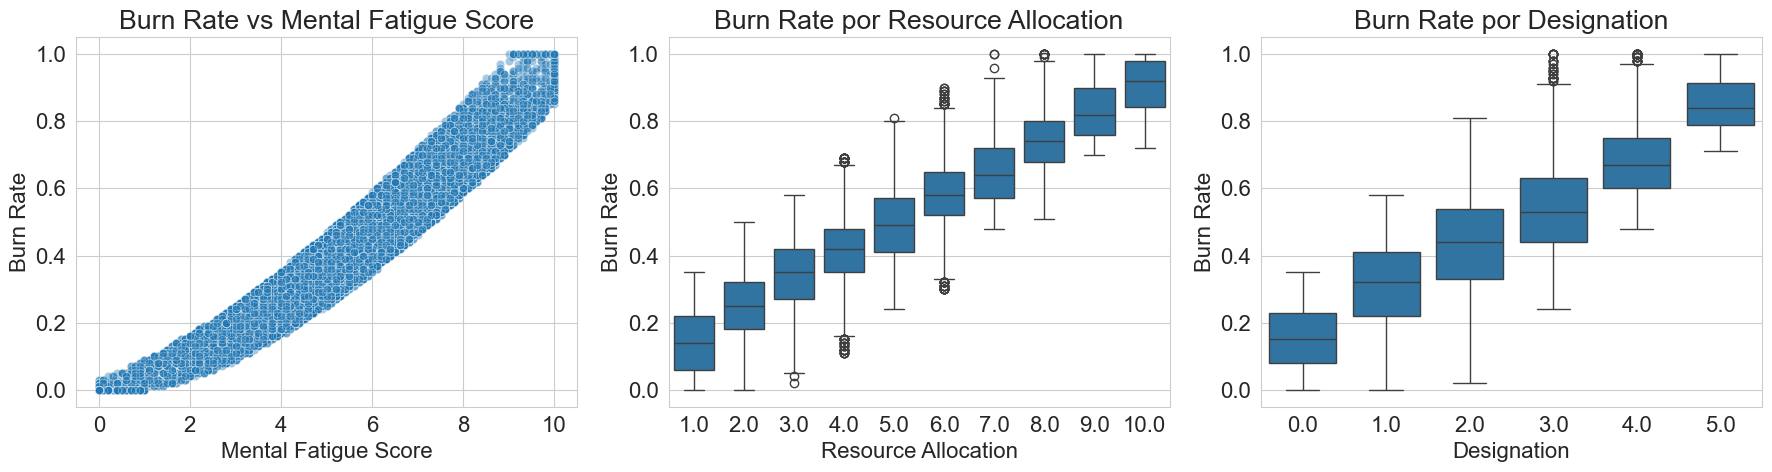

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 16
plt.figure(figsize=(18, 5))

# 1) Burn Rate x Mental Fatigue Score (relação aproximadamente linear)
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='Mental Fatigue Score',
    y='Burn Rate',
    data=df_train,
    alpha=0.4
)
plt.title('Burn Rate vs Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Burn Rate')

# 2) Burn Rate x Resource Allocation (boxplot)
plt.subplot(1, 3, 2)
sns.boxplot(
    x='Resource Allocation',
    y='Burn Rate',
    data=df_train
)
plt.title('Burn Rate por Resource Allocation')
plt.xlabel('Resource Allocation')
plt.ylabel('Burn Rate')

# 3) Burn Rate x Designation (boxplot)
plt.subplot(1, 3, 3)
sns.boxplot(
    x='Designation',
    y='Burn Rate',
    data=df_train
)
plt.title('Burn Rate por Designation')
plt.xlabel('Designation')
plt.ylabel('Burn Rate')

plt.tight_layout()
plt.show()

### Distribuição das variáveis categóricas
A visualização das variáveis categóricas foi utilizada para verificar a sua distribuição percentual, motrando uma representatividade balanceada entre elas.

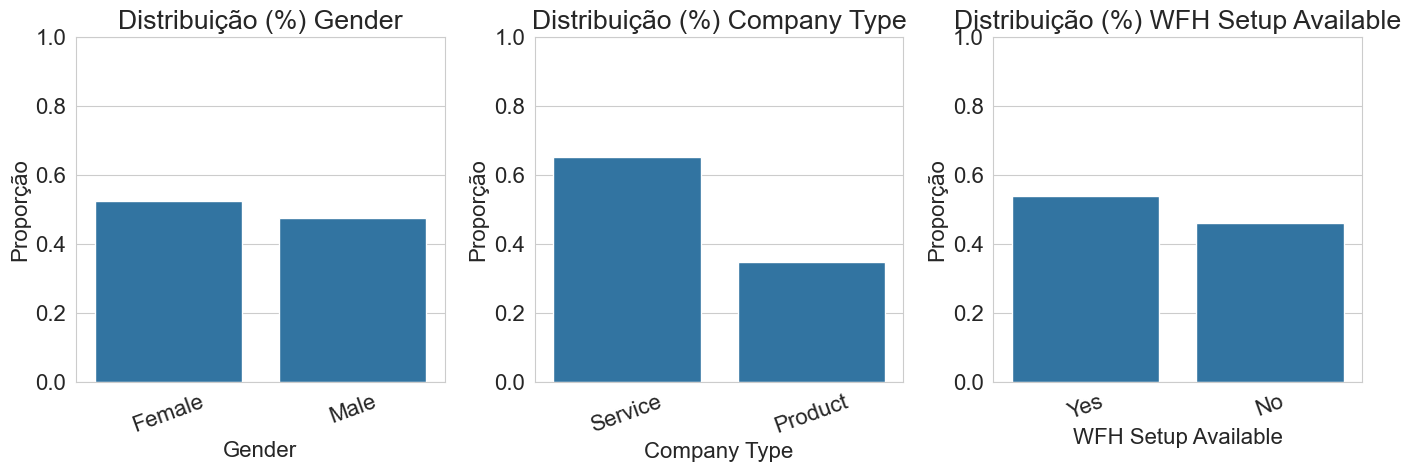

In [15]:
categorical_cols = ["Gender", "Company Type", "WFH Setup Available"]
plt.figure(figsize=(14, 5))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    prop = df_train[col].value_counts(normalize=True)
    sns.barplot(x=prop.index, y=prop.values)
    plt.title(f'Distribuição (%) {col}')
    plt.ylabel('Proporção')
    plt.ylim(0, 1)
    plt.xticks(rotation=20)

plt.tight_layout()
plt.show()




### Boxplots de Burn Rate por Variáveis Categóricas
Os boxplots de Burn Rate por variáveis categóricas não indicam diferenças extremas entre os grupos, sugerindo que esses fatores atuam como moduladores do risco de burnout. A ausência de contrastes acentuados reforça que tais variáveis contribuem de forma complementar à análise, sem dominarem isoladamente o comportamento do Burn Rate.


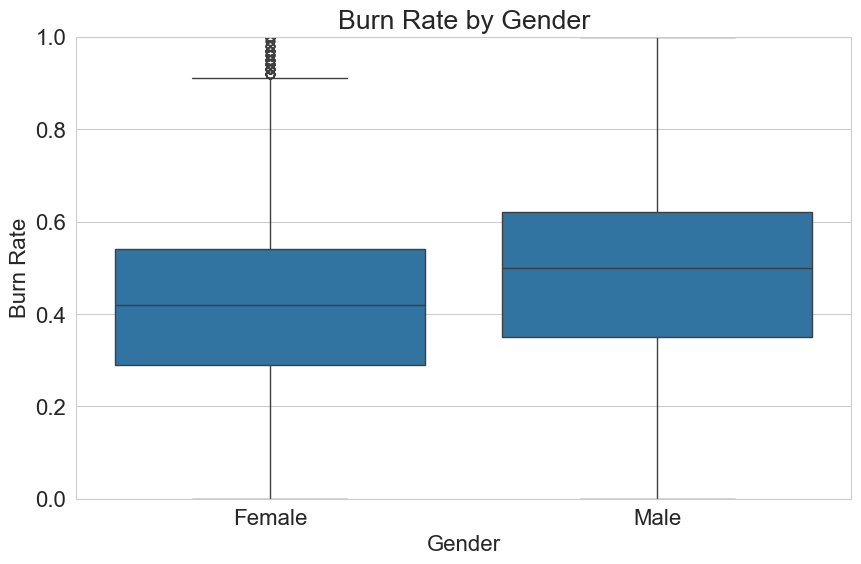

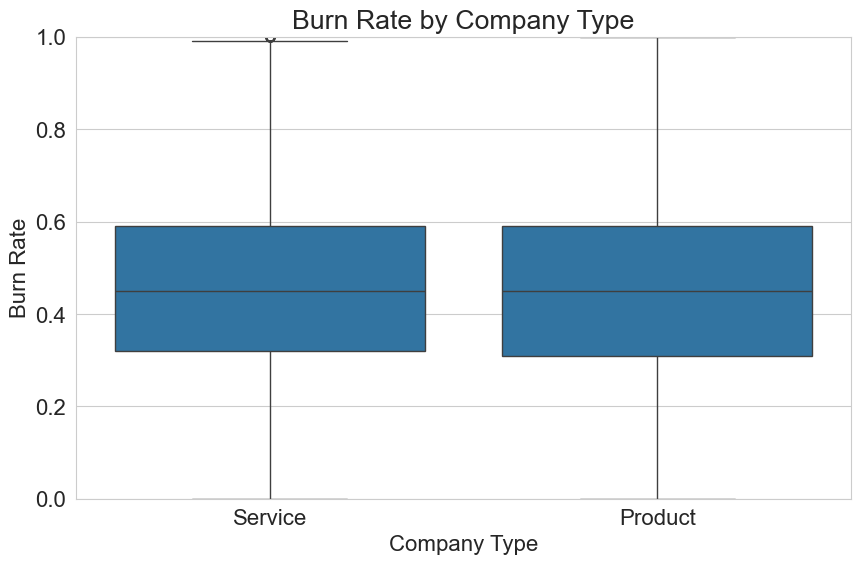

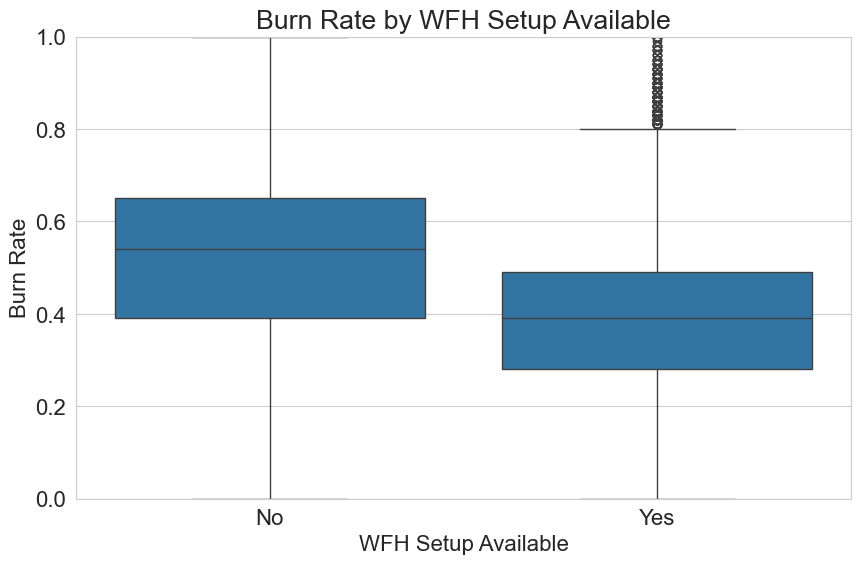

In [16]:
categorical_vars = ["Gender", "Company Type", "WFH Setup Available"]

for var in categorical_vars:
    sns.boxplot(x=var, y="Burn Rate", data=df_train)
    plt.title(f"Burn Rate by {var}")
    plt.ylim(0, 1)
    plt.show()


### Mapa de Calor da Correlação
O mapa de calor de correlação indica o grau de associação de cada variável numérica com o Burn Rate.


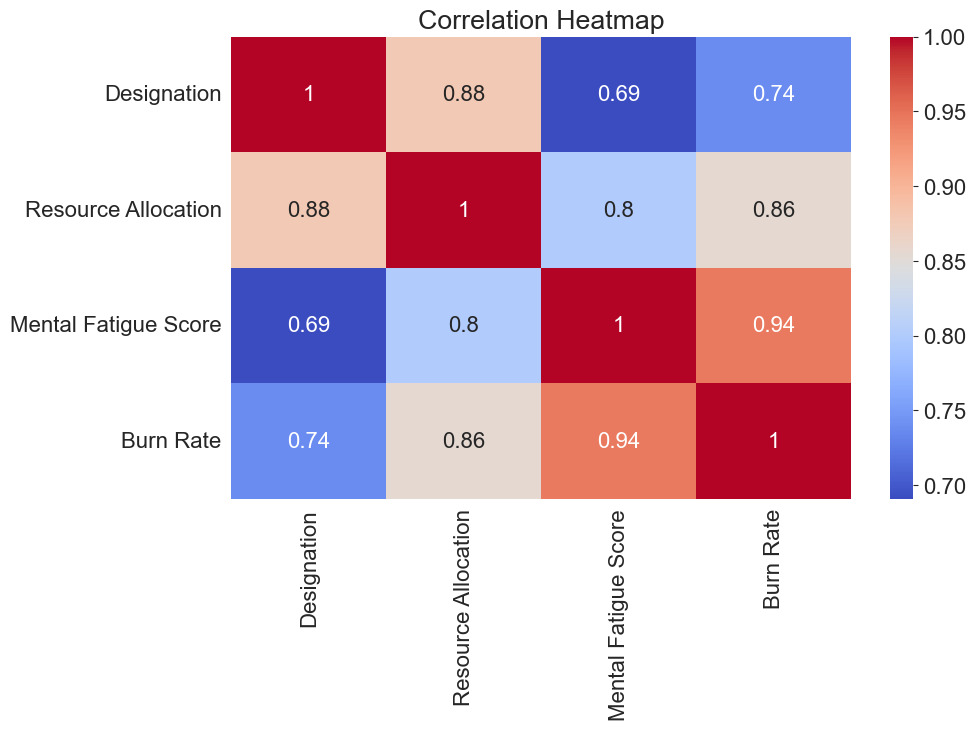

In [17]:
corr = df_train[
    ["Designation", "Resource Allocation", "Mental Fatigue Score", "Burn Rate"]
].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder

df_train = pd.read_csv(train_path)

df_train = df_train.drop(columns=["Employee ID", "Date of Joining"])
df_train = df_train.dropna().reset_index(drop=True)

le = LabelEncoder()

df_train["Gender"] = le.fit_transform(df_train["Gender"]) #Mulher = 0 ; Homem = 1
df_train["Company Type"] = le.fit_transform(df_train["Company Type"]) #Product = 0 ; Service = 1
df_train["WFH Setup Available"] = le.fit_transform(df_train["WFH Setup Available"]) #Não = 0 ; Sim = 1

df_train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2.0,3.0,3.8,0.16
1,1,1,1,1.0,2.0,5.0,0.36
2,1,1,1,1.0,1.0,2.6,0.20
3,0,1,0,3.0,7.0,6.9,0.52
4,1,0,1,2.0,4.0,3.6,0.29
...,...,...,...,...,...,...,...
18585,0,0,1,1.0,3.0,6.0,0.48
18586,1,0,0,3.0,7.0,6.2,0.54
18587,0,0,1,3.0,6.0,6.7,0.59
18588,0,1,0,2.0,5.0,5.9,0.52


### Criação de Feature com base no EDA
A feature Workload_Index foi criada para capturar o efeito combinado entre Resource Allocation e Designation, ambas associadas ao aumento do Burn Rate. A normalização garante uma escala adequada para a modelagem.

In [19]:
df_train['Workload_Index'] = df_train['Resource Allocation'] * df_train['Designation'] / 10
df_train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Workload_Index
0,0,1,0,2.0,3.0,3.8,0.16,0.6
1,1,1,1,1.0,2.0,5.0,0.36,0.2
2,1,1,1,1.0,1.0,2.6,0.20,0.1
3,0,1,0,3.0,7.0,6.9,0.52,2.1
4,1,0,1,2.0,4.0,3.6,0.29,0.8
...,...,...,...,...,...,...,...,...
18585,0,0,1,1.0,3.0,6.0,0.48,0.3
18586,1,0,0,3.0,7.0,6.2,0.54,2.1
18587,0,0,1,3.0,6.0,6.7,0.59,1.8
18588,0,1,0,2.0,5.0,5.9,0.52,1.0


Após a análise exploratória dos dados e limpeza dos dados, convertemos o dataset tratado para um .csv para tornar mais fácil o manuseio dele.

In [20]:
df_train.to_csv("burnout_preprocessado.csv", index=False)